In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [67]:
df = pd.read_csv('/Users/boryabaghir/Downloads/bike_rides.csv', index_col=0)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [68]:
df.rename(columns={'cnt': 'bike_rides'}, inplace=True)

In [69]:
season_mapping = {
    0: 'Spring',
    1: 'Summer',
    2: 'Fall',
    3: 'Winter'
}

weather_mapping = {
    1: 'Clear / Fog',
    2: 'Few Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain / Light Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

df['weather_code'] = df['weather_code'].map(weather_mapping)
df['season'] = df['season'].replace(season_mapping)

In [70]:
df

,bike_rides,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear / Fog,0.0,1.0,Winter
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken Clouds,0.0,0.0,Winter
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,Winter
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,Winter


In [71]:
df.isna().sum()

bike_rides      0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [72]:
df.duplicated().sum()

2

In [73]:
df = df.drop_duplicates()

In [74]:
df

,bike_rides,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear / Fog,0.0,1.0,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear / Fog,0.0,1.0,Winter
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken Clouds,0.0,0.0,Winter
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,Winter
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,Winter


In [75]:
df_encoded = pd.get_dummies(df, columns=['season', 'weather_code'], drop_first=True)


In [76]:
matrix = df_encoded.corr()
matrix

,bike_rides,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_Spring,season_Summer,season_Winter,weather_code_Clear / Fog,weather_code_Cloudy,weather_code_Few Clouds,weather_code_Rain / Light Rain,weather_code_Rain with Thunderstorm,weather_code_Snowfall
bike_rides,1.000000,0.388874,0.369113,-0.462928,0.116251,-0.051711,-0.096551,-0.021069,0.172031,-0.170432,0.013032,-0.141829,0.178636,-0.148453,-0.014633,-0.048356
t1,0.388874,1.000000,0.988344,-0.447785,0.145536,-0.042223,-0.005293,-0.187786,0.621068,-0.493630,0.015999,-0.100645,0.083671,-0.035523,0.004892,-0.076437
t2,0.369113,0.988344,1.000000,-0.403499,0.088474,-0.040040,-0.008459,-0.184188,0.602414,-0.505255,0.016108,-0.089247,0.072989,-0.037487,0.002823,-0.082035
hum,-0.462928,-0.447785,-0.403499,1.000000,-0.287803,0.032066,0.028094,-0.151269,-0.222204,0.224532,-0.223242,0.169533,-0.204848,0.262400,0.005018,0.067648
wind_speed,0.116251,0.145536,0.088474,-0.287803,1.000000,-0.002619,0.011425,0.035452,-0.009356,0.088435,-0.221261,-0.072353,0.128358,0.101996,0.006085,0.014547
is_holiday,-0.051711,-0.042223,-0.040040,0.032066,-0.002619,1.000000,-0.094911,0.085617,-0.043881,0.043886,0.006066,-0.011678,-0.013871,0.028322,-0.004260,-0.002157
is_weekend,-0.096551,-0.005293,-0.008459,0.028094,0.011425,-0.094911,1.000000,0.000233,-0.001358,0.001784,-0.020184,0.066502,-0.055896,0.008087,-0.008956,0.021427
season_Spring,-0.021069,-0.187786,-0.184188,-0.151269,0.035452,0.085617,0.000233,1.000000,-0.337070,-0.334245,0.055475,-0.020701,-0.019743,0.001493,0.016173,-0.020625
season_Summer,0.172031,0.621068,0.602414,-0.222204,-0.009356,-0.043881,-0.001358,-0.337070,1.000000,-0.333787,0.075218,-0.072800,0.032328,-0.035933,0.006882,-0.034116
season_Winter,-0.170432,-0.493630,-0.505255,0.224532,0.088435,0.043886,0.001784,-0.334245,-0.333787,1.000000,-0.085870,0.089023,-0.024303,0.038671,-0.011632,0.065933


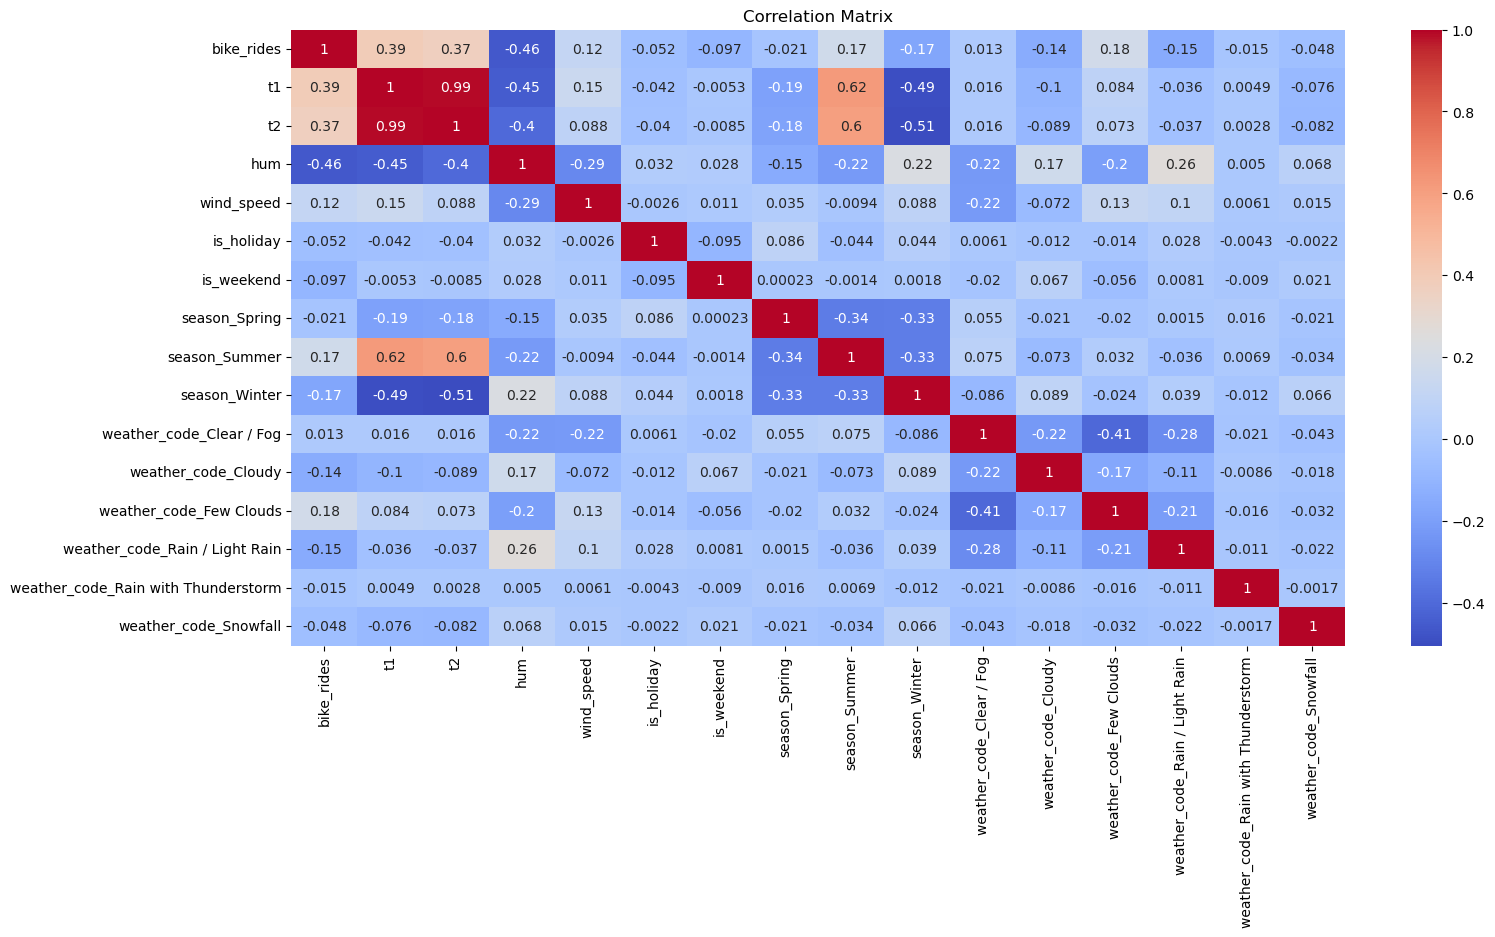

In [77]:
plt.figure(figsize=(17, 8))  # Example: 12 inches wide, 6 inches tall

sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
